<a href="https://colab.research.google.com/github/Pratham227/Heart-Disease-Prediction/blob/main/Heart_diseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_2020_cleaned.csv to heart_2020_cleaned (1).csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])
print("✅ Data Loaded Successfully!")
print(df.head())

✅ Data Loaded Successfully!
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes        

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

print("\n✅ Encoding Done!")
print(df.head())


Missing Values:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Data Types:
 HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

✅ Encoding Done!
   HeartDisease    BMI 

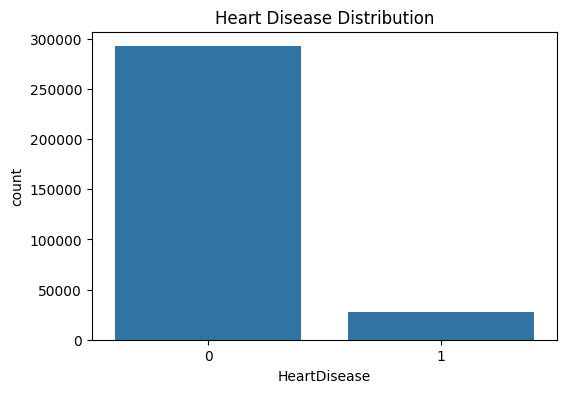

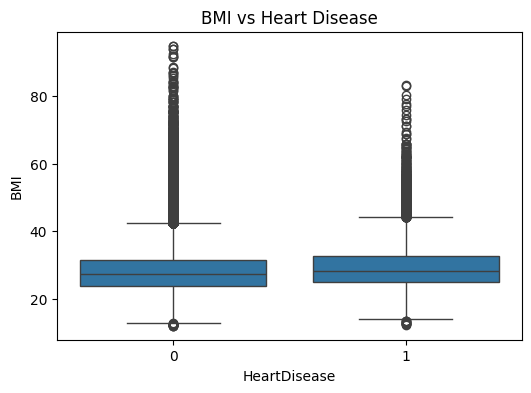

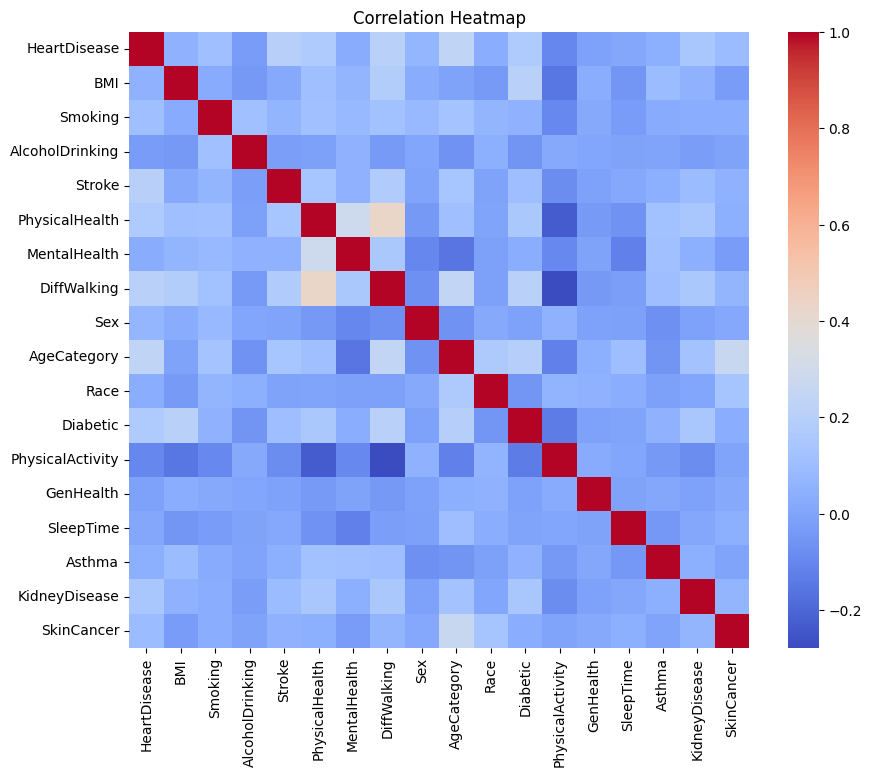

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='HeartDisease', y='BMI', data=df)
plt.title("BMI vs Heart Disease")
plt.show()

plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\n🔹 Logistic Regression Accuracy:", acc_lr)
print("🔹 Random Forest Accuracy:", acc_rf)



🔹 Logistic Regression Accuracy: 0.91281914976782
🔹 Random Forest Accuracy: 0.9040791757219468


In [ ]:
print("\n📋 Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("\n📋 Random Forest Report:\n", classification_report(y_test, y_pred_rf))


📋 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959


📋 Random Forest Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



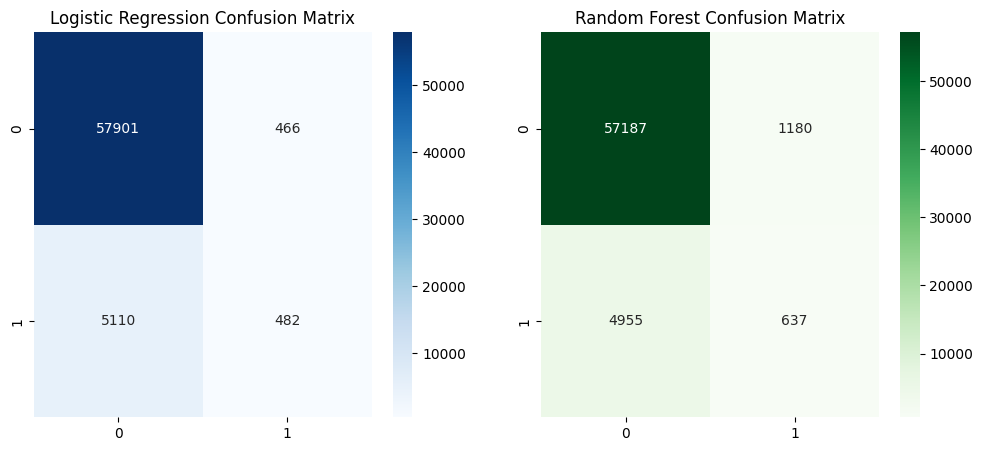

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')

plt.show()

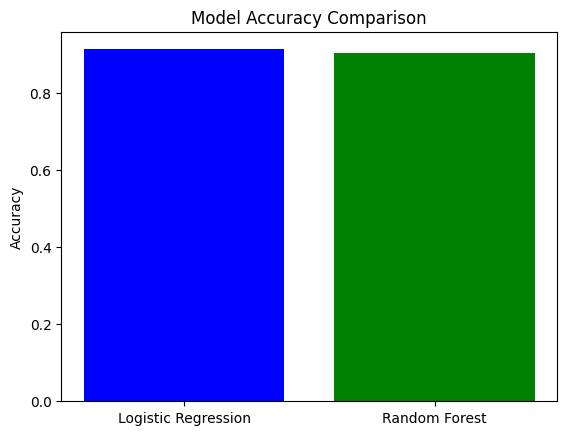


✅ Project Completed Successfully!


In [ ]:
plt.bar(['Logistic Regression', 'Random Forest'], [acc_lr, acc_rf], color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

print("\n✅ Project Completed Successfully!")

/tmp/ipython-input-1222245280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeCategory', y='HeartDisease', data=df, palette='coolwarm')


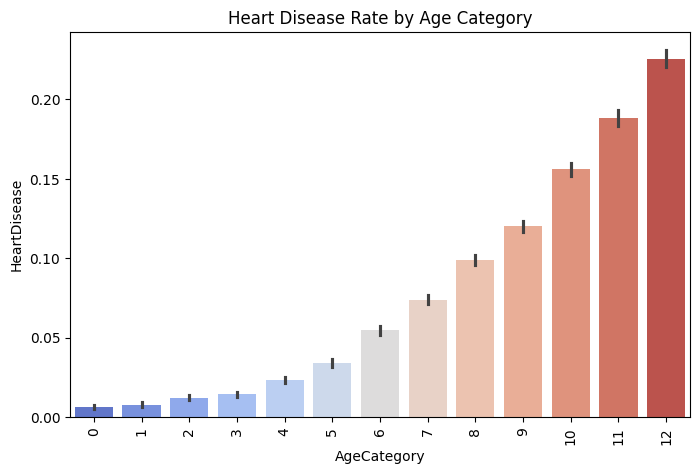

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


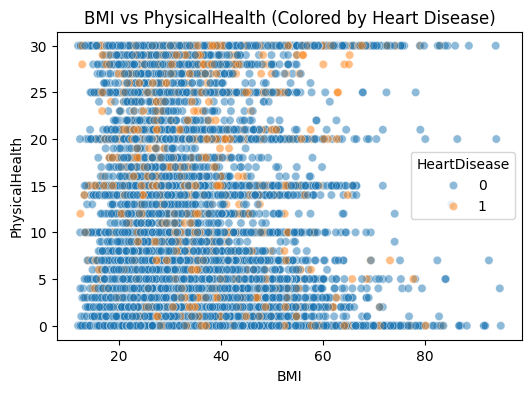

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


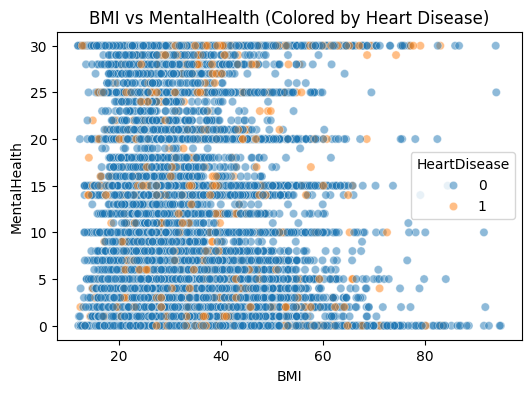

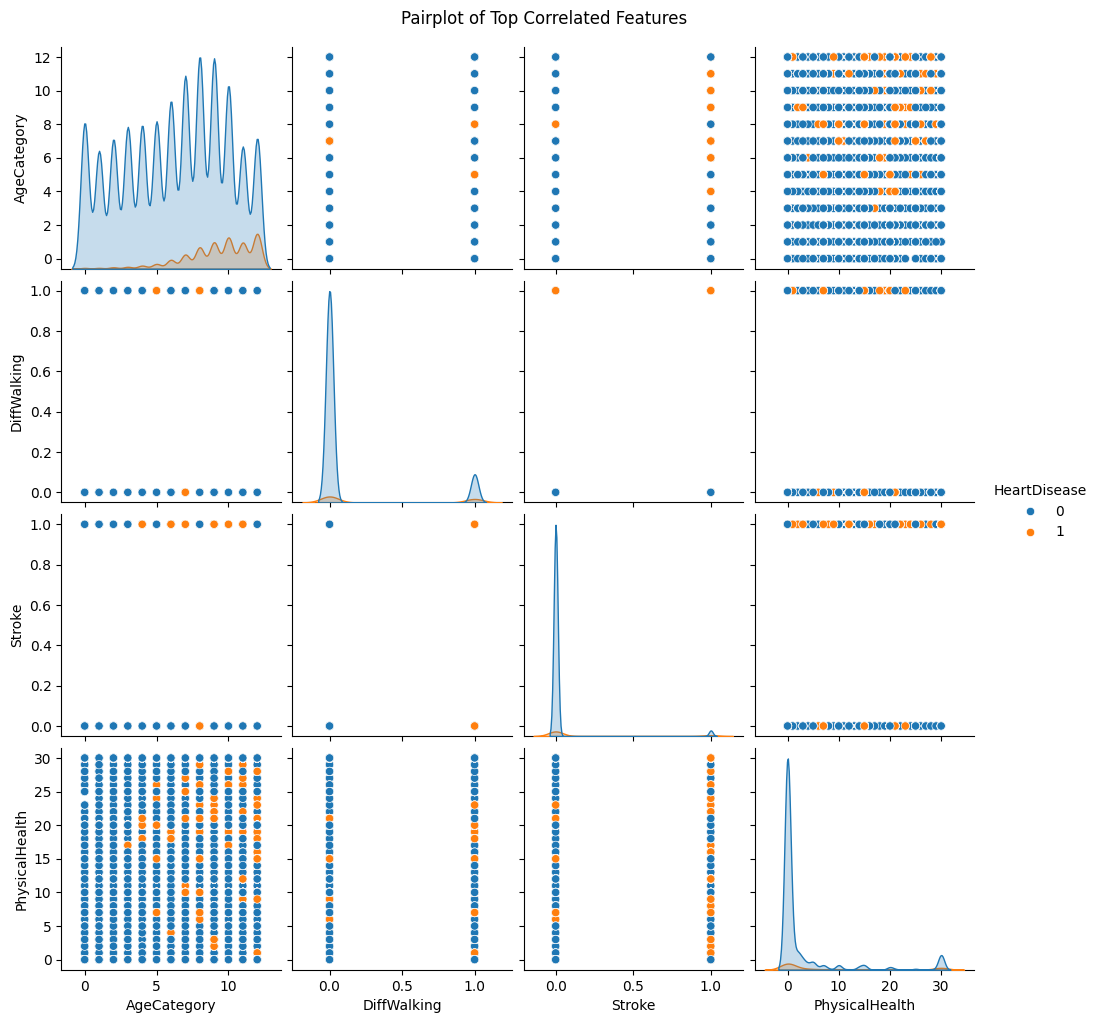

In [ ]:
# 3.4 Age Category vs Heart Disease
plt.figure(figsize=(8,5))
sns.barplot(x='AgeCategory', y='HeartDisease', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Heart Disease Rate by Age Category")
plt.show()

# 3.5 Scatter Plot: BMI vs PhysicalHealth
plt.figure(figsize=(6,4))
sns.scatterplot(x='BMI', y='PhysicalHealth', hue='HeartDisease', data=df, alpha=0.5)
plt.title("BMI vs PhysicalHealth (Colored by Heart Disease)")
plt.show()

# 3.6 Scatter Plot: BMI vs MentalHealth
plt.figure(figsize=(6,4))
sns.scatterplot(x='BMI', y='MentalHealth', hue='HeartDisease', data=df, alpha=0.5)
plt.title("BMI vs MentalHealth (Colored by Heart Disease)")
plt.show()

# 3.7 Pairplot for top correlated features
top_corr = df.corr().nlargest(5, 'HeartDisease')['HeartDisease'].index
sns.pairplot(df[top_corr], hue='HeartDisease', diag_kind='kde')
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()